In [118]:
from rpy2.robjects import r
from rpy2.robjects import pandas2ri
import pandas as pd
pandas2ri.activate()
from pprint import pprint
import seaborn as sns

# downloading the Rdata file and loading it

In [123]:
#If you want ot use the requests library, you can use this block
# import requests

# url = 'http://www.openintro.org/stat/data/bdims.RData'
# a = requests.get(url)
# with open('./bdims123123.Rdata', 'wb') as f:
#     for chunk in a:
#         f.write(chunk)

In [119]:
# I will use urllib.request because I am more familiar with this
import urllib.request
...
# Download the file from `url` and save it locally under `file_name`:
urllib.request.urlretrieve("http://www.openintro.org/stat/data/bdims.RData",\
                           './bdims.Rdata')

('./bdims.Rdata', <http.client.HTTPMessage at 0x227bb2cb4a8>)

# Using rpy2 library to load Rdata on python

In [126]:
r.load("C:/Users/Jinoo/Desktop/Statistics/bdims.Rdata")

'bdims','qqnormsim'


In [128]:
type(r)

rpy2.robjects.R

In [5]:
df=r['bdims'] # As r is an robjects that contain 'bdims' dataframe which we need, assigning it to the variable 'df'

In [6]:
df.head()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [7]:
df.tail()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0
506,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,30.6,24.9,38.4,36.6,22.0,15.5,33,66.4,174.0,0
507,35.6,29.0,29.0,20.4,26.8,13.4,10.8,18.7,13.8,100.5,...,33.2,25.5,39.6,35.9,23.0,16.4,38,67.3,163.8,0


In [8]:
df.shape # Checking out how many rows and columns the df has.

(507, 25)

# Using .loc to slice only male data from df

In [9]:
mdims=df.loc[df.loc[:,'sex'] == '1',:] # sex = 1 stands for men, while 0 means women
mdims.head()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [10]:
mdims.shape # We have 247 male observations

(247, 25)

In [11]:
fdims=df.loc[df.loc[:,'sex']=="0",:]
fdims.head()

,bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
248,37.6,25.0,31.3,16.2,24.9,11.2,9.2,17.0,12.3,95.0,...,24.3,20.5,32.0,32.2,21.0,13.5,22,51.6,161.2,0
249,36.7,26.4,31.0,16.8,24.5,12.1,9.9,19.3,12.8,99.5,...,27.8,24.0,38.5,38.5,22.5,15.0,20,59.0,167.5,0
250,34.8,25.9,30.2,16.4,24.2,11.3,8.9,17.0,12.2,88.0,...,24.0,22.0,32.5,32.5,19.0,14.0,19,49.2,159.5,0
251,36.6,27.9,31.8,19.3,24.9,12.3,9.5,18.6,13.0,97.0,...,28.0,24.0,35.2,36.7,23.0,15.0,25,63.0,157.0,0
252,35.5,28.2,31.0,18.2,26.2,11.5,9.1,17.2,12.4,103.3,...,26.9,22.7,33.0,33.3,19.9,14.5,21,53.6,155.8,0


In [129]:
fdims.shape   # We have 260 female observations

(260, 25)

In [130]:
df.columns    # Getting Column names

Index(['bia.di', 'bii.di', 'bit.di', 'che.de', 'che.di', 'elb.di', 'wri.di',
       'kne.di', 'ank.di', 'sho.gi', 'che.gi', 'wai.gi', 'nav.gi', 'hip.gi',
       'thi.gi', 'bic.gi', 'for.gi', 'kne.gi', 'cal.gi', 'ank.gi', 'wri.gi',
       'age', 'wgt', 'hgt', 'sex'],
      dtype='object')

# Slicing subset data of male and female

In [14]:
mhgt=mdims.loc[:,'hgt']
mhgt

1      174.0
2      175.3
3      193.5
4      186.5
5      187.2
6      181.5
7      184.0
8      184.5
9      175.0
10     184.0
11     180.0
12     177.8
13     192.0
14     176.0
15     174.0
16     184.0
17     192.7
18     171.5
19     173.0
20     176.0
21     176.0
22     180.5
23     172.7
24     176.0
25     173.5
26     178.0
27     180.3
28     180.3
29     164.5
30     173.0
       ...  
218    181.6
219    177.8
220    182.9
221    177.8
222    184.2
223    179.1
224    176.5
225    188.0
226    174.0
227    167.6
228    170.2
229    167.6
230    188.0
231    174.0
232    176.5
233    180.3
234    167.6
235    188.0
236    180.3
237    167.6
238    183.0
239    183.0
240    179.1
241    170.2
242    177.8
243    179.1
244    190.5
245    177.8
246    180.3
247    180.3
Name: hgt, Length: 247, dtype: float64

In [15]:
fhgt=fdims.loc[:,'hgt']
fhgt

248    161.2
249    167.5
250    159.5
251    157.0
252    155.8
253    170.0
254    159.1
255    166.0
256    176.2
257    160.2
258    172.5
259    170.9
260    172.9
261    153.4
262    160.0
263    147.2
264    168.2
265    175.0
266    157.0
267    167.6
268    159.5
269    175.0
270    166.8
271    176.5
272    170.2
273    174.0
274    173.0
275    179.9
276    170.5
277    160.0
       ...  
478    167.6
479    167.6
480    167.6
481    154.9
482    162.6
483    175.3
484    171.4
485    157.5
486    165.1
487    160.0
488    174.0
489    162.6
490    174.0
491    162.6
492    161.3
493    156.2
494    149.9
495    169.5
496    160.0
497    175.3
498    169.5
499    160.0
500    172.7
501    162.6
502    157.5
503    176.5
504    164.4
505    160.7
506    174.0
507    163.8
Name: hgt, Length: 260, dtype: float64

# Exercise 1
* Make a histogram of men's heights and a histogram of women's heights

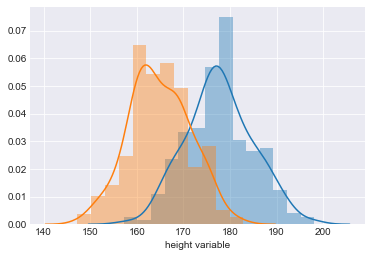

In [132]:
ax=sns.distplot(mhgt,axlabel='height variable')
ax=sns.distplot(fhgt,axlabel='height variable')

In [17]:
fhgtmean=fhgt.mean()
print(fhgtmean)
fhgtsd=fhgt.std()
print(fhgtsd)

164.8723076923075
6.544602130597173


# Exercise 2
* Q. Based on this plot, does it appear that the data follow a nearly normal distribution?
* A. Hard yes. The center of the histogram's height is taller than those of the both ends so we can say the data follow a nearly normal distribution

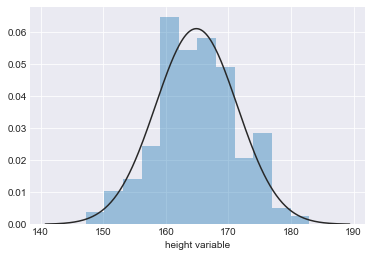

In [18]:
from scipy import stats
ax=sns.distplot(fhgt,axlabel='height variable',kde = False,fit=stats.norm)

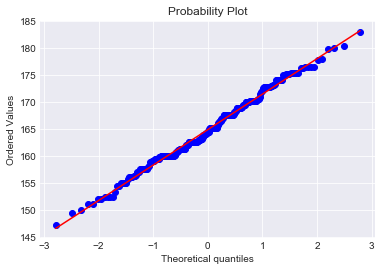

In [19]:
import scipy.stats as stats
import pylab 

stats.probplot(fhgt, dist="norm", plot=pylab);

# Exercise 3
* Q. Make a normal probability plot of sim_norm. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?
* A. Most of the data fall on the line but only as many as female height

__Normal probability plot is also called 'Q-Q plot', because it matches quantiles of two different probability distributions. You can make this chart on Python with stats.probplot command__

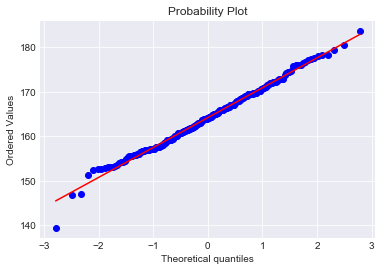

In [20]:
import numpy as np

mu, sigma= fhgtmean, fhgtsd
sim_norm = np.random.normal(mu, sigma, len(fdims))
stats.probplot(sim_norm, dist="norm", plot=pylab);

# Exercise 4
* Q. Does the normal probability plot for fdims$hgt look similar to the plots created for the simulated data? That is, do plots provide evidence that the female heights are nearly normal?


* A. Yes to both questions. The hgt plot looks almost identical to the 3 plots of simulated date below.So these 3 plots provide enough evidence to prove that fdims$hgt follow nearly the normal distribution

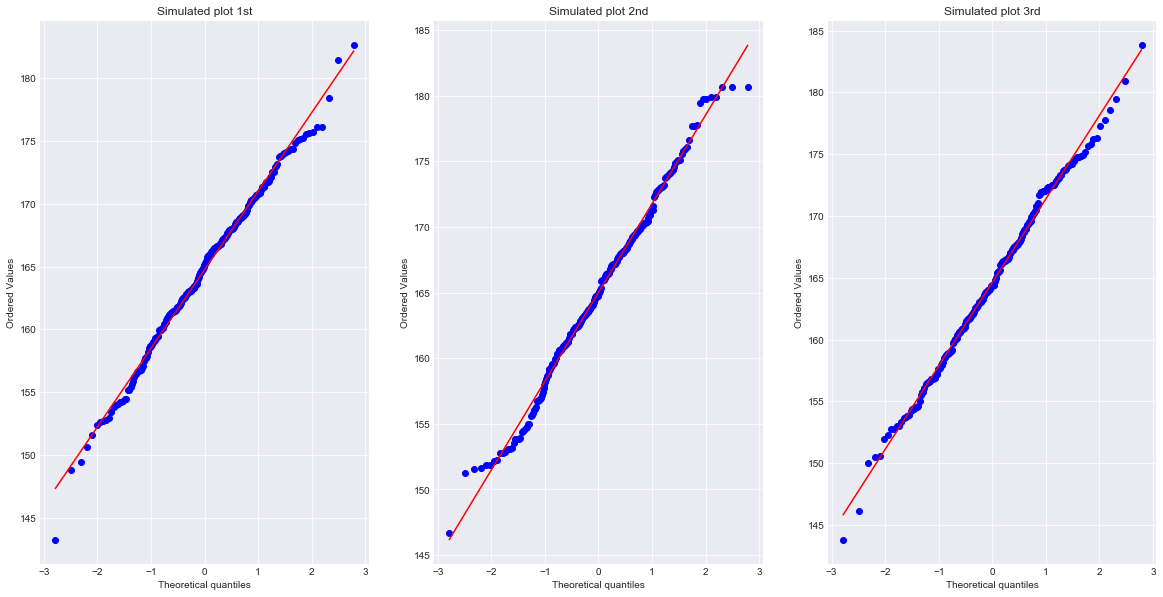

In [133]:
import numpy as np

fig=plt.figure(figsize=(20,10))

# adding the 1st plot
ax1=fig.add_subplot(131)
mu, sigma= fhgtmean, fhgtsd
sim_norm = np.random.normal(mu, sigma, len(fdims))
stats.probplot(sim_norm, dist="norm", plot=pylab);
ax1.set_title("Simulated plot 1st");

# adding the 2nd plot
ax2=fig.add_subplot(132)
mu, sigma= fhgtmean, fhgtsd
sim_norm = np.random.normal(mu, sigma, len(fdims))
stats.probplot(sim_norm, dist="norm", plot=pylab);
ax2.set_title("Simulated plot 2nd");

# adding the 3rd plot
ax3=fig.add_subplot(133)
mu, sigma= fhgtmean, fhgtsd
sim_norm = np.random.normal(mu, sigma, len(fdims))
stats.probplot(sim_norm, dist="norm", plot=pylab);
ax3.set_title("Simulated plot 3rd");

# Exercise 5
* Q. Using the same technique, determine whether or not female weights appear to come from a normal distribution.
* A. Yes and no. Female weights seem to deviate from a red diagonal line, but it's not clear whether it deviates enough to say that it is not coming from a normal distribution

In [24]:
fwgt=fdims.loc[:,'wgt']
fwgt[0:5]

248    51.6
249    59.0
250    49.2
251    63.0
252    53.6
Name: wgt, dtype: float64

In [25]:
fwgtmean=fwgt.mean()
print(fwgtmean)
fwgtstd=fwgt.std()
print(fwgtstd)

60.60038461538461
9.61569862688926


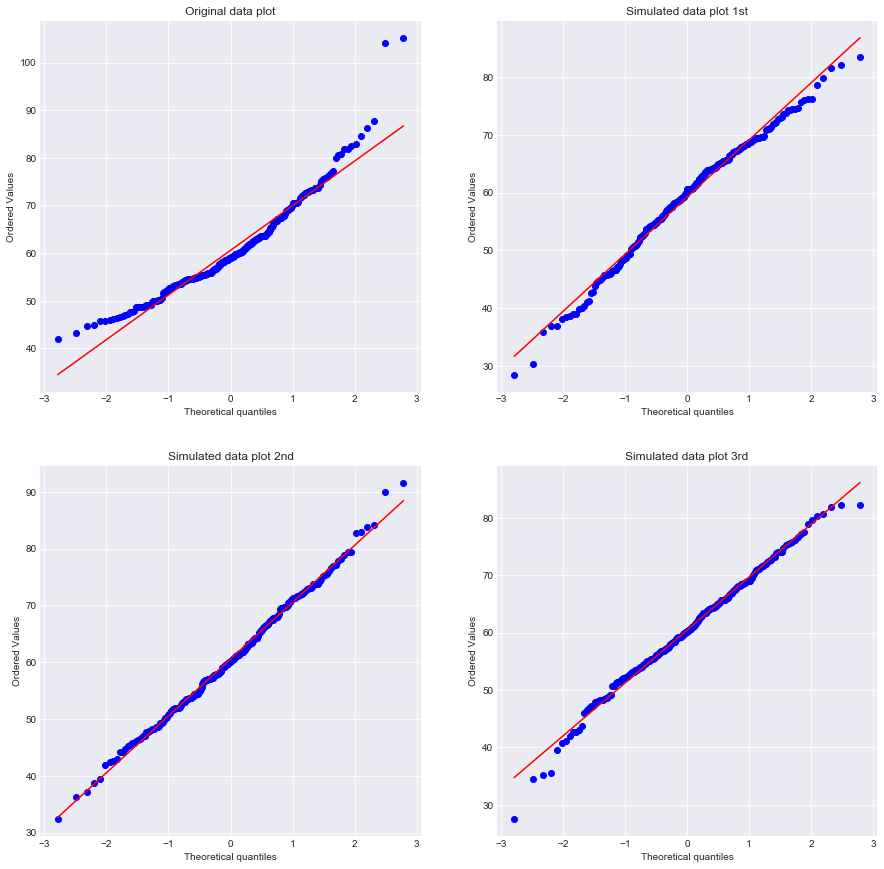

In [135]:
fig=plt.figure(figsize=(15,15))

# adding the 1st plot
ax1=fig.add_subplot(221)
stats.probplot(fwgt, dist="norm", plot=pylab);
ax1.set_title('Original data plot');

#adding the 2nd plot
ax2=fig.add_subplot(222)
mu, sigma= fwgtmean, fwgtstd
sim_norm = np.random.normal(mu, sigma, len(fdims))
stats.probplot(sim_norm, dist="norm", plot=pylab);
ax2.set_title('Simulated data plot 1st');

#adding the 3rd plot
ax3=fig.add_subplot(223)
mu, sigma= fwgtmean, fwgtstd
sim_norm = np.random.normal(mu, sigma, len(fdims))
stats.probplot(sim_norm, dist="norm", plot=pylab);
ax3.set_title('Simulated data plot 2nd');

#adding the 4th plot
ax4=fig.add_subplot(224)
mu, sigma= fwgtmean, fwgtstd
sim_norm = np.random.normal(mu, sigma, len(fdims))
stats.probplot(sim_norm, dist="norm", plot=pylab);
ax4.set_title('Simulated data plot 3rd');

# Calculating the probability of how many data is below a certain point

In [30]:
from scipy.stats import norm

1- norm.cdf(182, fhgtmean, fhgtsd)

0.004434386918686806

In [31]:
np.sum(len(fdims.loc[fdims.loc[:,'hgt']>182,:]))/len(fdims)

0.0038461538461538464

# Exercise 6
* Write out two probability questions that you would like to answer; one regarding female heights and one regarding female weights. Calculate the those probabilities using both the theoretical normal distribution as well as the empirical distribution (four probabilities in all). Which variable, height or weight, had a closer agreement between the two methods?

In [32]:
# question no.1
# This question is about female heights
norm.cdf(167, fhgtmean, fhgtsd)

0.6274497429142988

__Theoretically speaking, under the sample mean and standard deviation, 62.7 percent of females' heights are under 167cm__

In [33]:
np.sum(len(fdims.loc[fdims.loc[:,'hgt']<=167,:]))/len(fdims)

0.6076923076923076

__The sample data shows that 60.7 percent of females' heights are under 167cm. They are almost identically same so we confirmed once again that female height follows a normal distribution__

In [34]:
# question no.2
# This question is about female weights
1-norm.cdf(70, fwgtmean, fwgtstd)

0.16415389241115141

__Theoretically speaking, under the sample mean and standard deviation, 16.4 percent of females' weights are above 70kg__

In [35]:
np.sum(len(fdims.loc[fdims.loc[:,'wgt']>=70,:]))/len(fdims)

0.1576923076923077

__The sample data shows that 15.7 percent of females' weights are above 70kg. They are almost identically same so we confirmed once again that female height follows a normal distribution. __
__Since weight percentages are less than 1 percent away from each other while height percentages are about 2 percent away, we can say that weight more closely follows the normal distribution__

# On your own

## - Question no.1
- Q. Now let’s consider some of the other variables in the body dimensions data set. Using the figures at the end of the exercises, match the histogram to its normal probability plot. All of the variables have been standardized (first subtract the mean, then divide by the standard deviation), so the units won’t be of any help.
- A. The answers are provided below with each plot

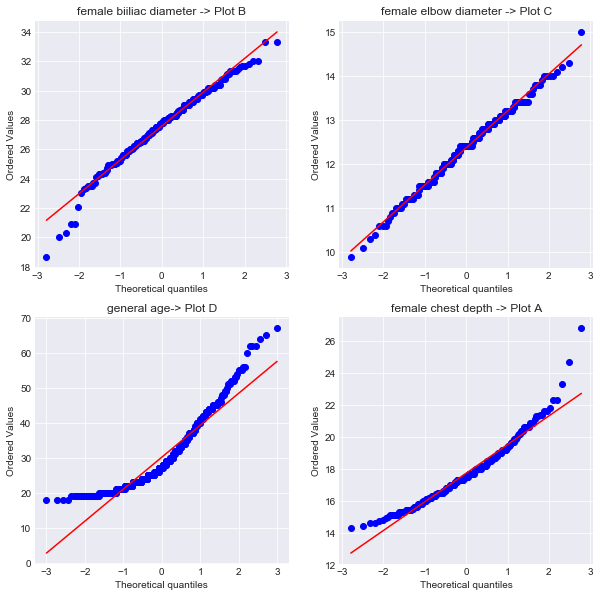

In [95]:
import matplotlib.pyplot as plt 

# setting the figure for the 4 plots to be put inside
fig=plt.figure(figsize=(10,10))

# the 1st plot 
ax1=fig.add_subplot(221)
fbii=fdims.loc[:,'bii.di']
stats.probplot(fbii, dist="norm", plot=pylab);
ax1.set_title("female biiliac diameter -> Plot B");

# the 2nd plot
ax2=fig.add_subplot(222)
felb=fdims.loc[:,'elb.di']
stats.probplot(felb, dist="norm", plot=pylab);
ax2.set_title("female elbow diameter -> Plot C");

# the 3rd plot
ax3=fig.add_subplot(223)
age=df.loc[:,'age']
stats.probplot(age, dist="norm", plot=pylab);
ax3.set_title("general age-> Plot D");

# the 4th plot
ax4=fig.add_subplot(224)
chest=fdims.loc[:,'che.de']
stats.probplot(chest, dist="norm", plot=pylab);
ax4.set_title("female chest depth -> Plot A");

## - Question no.2
* Q. Note that normal probability plots C and D have a slight stepwise pattern. Why do you think this is the case?
* A. The stepwise pattern in a Q-Q plot means that the observations are clustered in that area. As such, while the theoretical quantities goes up,the ordered values do not go up much since values in that area share similar values.  

## - Question no.3
* Q. As you can see, normal probability plots can be used both to assess normality and visualize skewness. Make a normal probability plot for female knee diameter (kne.di). Based on this normal probability plot, is this variable left skewed, symmetric, or right skewed? Use a histogram to confirm your findings.
* A. Female knee variables are right skewed because it has a longer tail on the right side as you can see on the histogra, located on the right hand side. This causes the dots on the Q-Q plot's top right corner to get far away from the red line. The dots on the bottom left corner is also far away from the red line because the value of the varaibles are larger than the expected value if it was normal distributed.

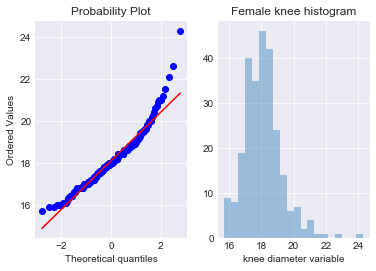

In [97]:
import matplotlib.pyplot as plt
ax1=plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
stats.probplot(fkne, dist="norm", plot=pylab);
ax2=plt.subplot(122)
sns.distplot(fkne,axlabel='knee diameter variable',kde = False);
ax2.set_title("Female knee histogram");